In [162]:
import pandas as pd 
import numpy as np

The following data gives quarterly sales of a commodity.
Estimate the trend and seasonal components using the classical
decomposition method. Assume a multiplicative model for the data.

In [163]:
df = pd.read_csv('/Users/meetsudra/Documents/GitHub/timeseries/datasets/data.csv')
df.head(5)

,Year,Quarter,Sales
0,1,1,4.8
1,1,2,4.1
2,1,3,6.0
3,1,4,6.5
4,2,1,5.8


the data is quarterly and hence will estimate trend using Moving average method using extent as 4

In [164]:
df["MA"] = df["Sales"].rolling(window=4, center=True).mean()
df

,Year,Quarter,Sales,MA
0,1,1,4.8,NaN
1,1,2,4.1,NaN
2,1,3,6.0,5.350
3,1,4,6.5,5.600
4,2,1,5.8,5.875
5,2,2,5.2,6.075
6,2,3,6.8,6.300
7,2,4,7.4,6.350
8,3,1,6.0,6.450
9,3,2,5.6,6.625


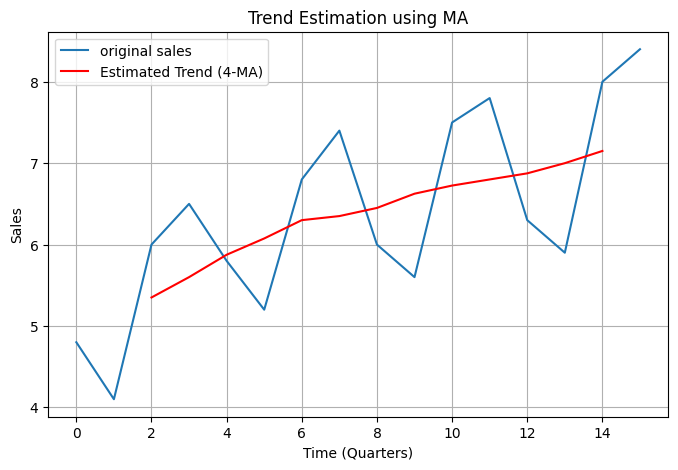

In [165]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,5))
plt.plot(df.index,df["Sales"],label="original sales")
plt.plot(df.index,df["MA"],label="Estimated Trend (4-MA)",color='red')
plt.xlabel("Time (Quarters)")
plt.ylabel("Sales")
plt.title("Trend Estimation using MA")
plt.legend()
plt.grid()
plt.show()

Since the extent was even we will compute centered Moving Average 

In [166]:
df["CMA"] = df["MA"].rolling(window=2).mean()
df

,Year,Quarter,Sales,MA,CMA
0,1,1,4.8,NaN,NaN
1,1,2,4.1,NaN,NaN
2,1,3,6.0,5.350,NaN
3,1,4,6.5,5.600,5.4750
4,2,1,5.8,5.875,5.7375
5,2,2,5.2,6.075,5.9750
6,2,3,6.8,6.300,6.1875
7,2,4,7.4,6.350,6.3250
8,3,1,6.0,6.450,6.4000
9,3,2,5.6,6.625,6.5375


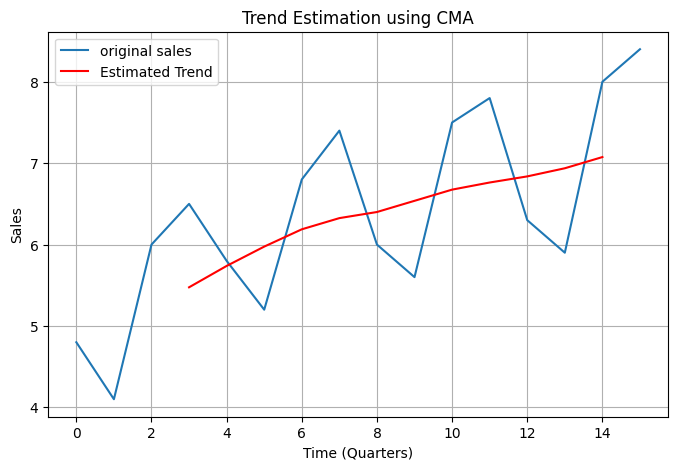

In [167]:
plt.figure(figsize=(8,5))
plt.plot(df.index,df["Sales"],label="original sales")
plt.plot(df.index,df["CMA"],label="Estimated Trend",color='red')
plt.xlabel("Time (Quarters)")
plt.ylabel("Sales")
plt.title("Trend Estimation using CMA")
plt.legend()
plt.grid()
plt.show()

CMA is a better trend estimator than SimpleMA

Now since we have estimated the trend component, we need to remove the trend from og data. This will isolate the seasonal and random compnenet 

Now since we have assumed that the model is multiplicative that is Yt = Tt * St

St = Yt/Tt

St is the seasonal and residual component, Yt is the actual series at time t and Tt is the CMA we got  

In [168]:
df["St"] = df["Sales"]/df["CMA"]

In [169]:
df

,Year,Quarter,Sales,MA,CMA,St
0,1,1,4.8,NaN,NaN,NaN
1,1,2,4.1,NaN,NaN,NaN
2,1,3,6.0,5.350,NaN,NaN
3,1,4,6.5,5.600,5.4750,1.187215
4,2,1,5.8,5.875,5.7375,1.010893
5,2,2,5.2,6.075,5.9750,0.870293
6,2,3,6.8,6.300,6.1875,1.098990
7,2,4,7.4,6.350,6.3250,1.169960
8,3,1,6.0,6.450,6.4000,0.937500
9,3,2,5.6,6.625,6.5375,0.856597


We will extract seasonal indices which help us extract pure seasonality pattern by averaging out the random noise over multiple years

we average St across multiple year for each quarter, this removes irregular effects and gives a consistent pattern 

In [170]:
# Estimating seasonal indices 
seasonality = df.groupby("Quarter")["St"].mean()
seasonality 

Quarter
1    0.956594
2    0.859113
3    1.117776
4    1.170198
Name: St, dtype: float64

In [171]:
og_seasonalcompomean = seasonality.mean()
og_seasonalcompomean

1.0259203893581474

In [172]:
# Normalising so that we get mean = 1
seasonality = seasonality/og_seasonalcompomean

In [173]:
seasonality.mean()
#in a multiplicative model, we want the seasonal components to represent pure percentage effects, and their mean should be exactly 1, so they don’t distort the trend!

1.0000000000000002

In [174]:
seasonality

Quarter
1    0.932425
2    0.837407
3    1.089535
4    1.140633
Name: St, dtype: float64

In [175]:
# assigning the seasonal index to every row in the df 
df["Seasonality_index"] = df["Quarter"].map(seasonality)

In [176]:
df

,Year,Quarter,Sales,MA,CMA,St,Seasonality_index
0,1,1,4.8,NaN,NaN,NaN,0.932425
1,1,2,4.1,NaN,NaN,NaN,0.837407
2,1,3,6.0,5.350,NaN,NaN,1.089535
3,1,4,6.5,5.600,5.4750,1.187215,1.140633
4,2,1,5.8,5.875,5.7375,1.010893,0.932425
5,2,2,5.2,6.075,5.9750,0.870293,0.837407
6,2,3,6.8,6.300,6.1875,1.098990,1.089535
7,2,4,7.4,6.350,6.3250,1.169960,1.140633
8,3,1,6.0,6.450,6.4000,0.937500,0.932425
9,3,2,5.6,6.625,6.5375,0.856597,0.837407


In [177]:
# Deseasonalising the series
df["Deseasonalized_sales"] = df["Sales"] / df["Seasonality_index"]

In [178]:
df

,Year,Quarter,Sales,MA,CMA,St,Seasonality_index,Deseasonalized_sales
0,1,1,4.8,NaN,NaN,NaN,0.932425,5.147865
1,1,2,4.1,NaN,NaN,NaN,0.837407,4.896064
2,1,3,6.0,5.350,NaN,NaN,1.089535,5.506938
3,1,4,6.5,5.600,5.4750,1.187215,1.140633,5.698592
4,2,1,5.8,5.875,5.7375,1.010893,0.932425,6.220337
5,2,2,5.2,6.075,5.9750,0.870293,0.837407,6.209642
6,2,3,6.8,6.300,6.1875,1.098990,1.089535,6.241197
7,2,4,7.4,6.350,6.3250,1.169960,1.140633,6.487628
8,3,1,6.0,6.450,6.4000,0.937500,0.932425,6.434831
9,3,2,5.6,6.625,6.5375,0.856597,0.837407,6.687307


### PREDICTION

In [179]:
df["t"] = np.arange(1,len(df)+1)
X = df["t"].to_numpy().reshape(-1,1) # independent variable (Time)

In [180]:
y = df["Deseasonalized_sales"]

In [181]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [182]:
alpha = model.intercept_
beta = model.coef_[0]

In [183]:
alpha

5.104090375045177

In [184]:
beta

0.14776459775820797

In [185]:
df["Trend"] = model.predict(X)

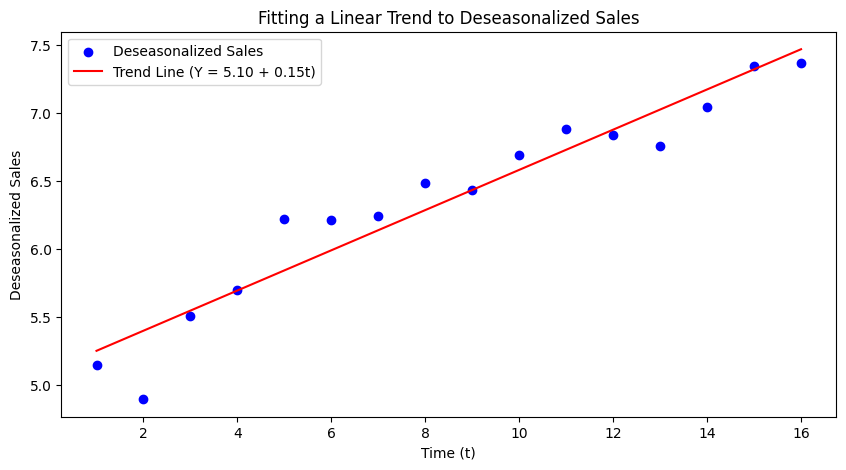

In [186]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Deseasonalized Sales", color="blue")
plt.plot(X, df["Trend"], label=f"Trend Line (Y = {alpha:.2f} + {beta:.2f}t)", color="red")
plt.xlabel("Time (t)")
plt.ylabel("Deseasonalized Sales")
plt.title("Fitting a Linear Trend to Deseasonalized Sales")
plt.legend()
plt.show()

In [187]:
df # trend is predicted deseasonailsed sales 

,Year,Quarter,Sales,MA,CMA,St,Seasonality_index,Deseasonalized_sales,t,Trend
0,1,1,4.8,NaN,NaN,NaN,0.932425,5.147865,1,5.251855
1,1,2,4.1,NaN,NaN,NaN,0.837407,4.896064,2,5.399620
2,1,3,6.0,5.350,NaN,NaN,1.089535,5.506938,3,5.547384
3,1,4,6.5,5.600,5.4750,1.187215,1.140633,5.698592,4,5.695149
4,2,1,5.8,5.875,5.7375,1.010893,0.932425,6.220337,5,5.842913
5,2,2,5.2,6.075,5.9750,0.870293,0.837407,6.209642,6,5.990678
6,2,3,6.8,6.300,6.1875,1.098990,1.089535,6.241197,7,6.138443
7,2,4,7.4,6.350,6.3250,1.169960,1.140633,6.487628,8,6.286207
8,3,1,6.0,6.450,6.4000,0.937500,0.932425,6.434831,9,6.433972
9,3,2,5.6,6.625,6.5375,0.856597,0.837407,6.687307,10,6.581736


In [188]:
# Let us now predict the sales 
# Ŷsales = Ŷtrend + Sindex
# (predicted sales) = Predicted Deseasonalised Sales + Seasonal Index

df["Predicted sales"] = df["Trend"] * df["Seasonality_index"]


In [189]:
df["Predicted sales"]

0     4.896963
1     4.521681
2     6.044067
3     6.496072
4     5.448081
5     5.016638
6     6.688046
7     7.170253
8     5.999199
9     5.511595
10    7.332024
11    7.844433
12    6.550316
13    6.006551
14    7.976003
15    8.518614
Name: Predicted sales, dtype: float64

In [190]:
df

,Year,Quarter,Sales,MA,CMA,St,Seasonality_index,Deseasonalized_sales,t,Trend,Predicted sales
0,1,1,4.8,NaN,NaN,NaN,0.932425,5.147865,1,5.251855,4.896963
1,1,2,4.1,NaN,NaN,NaN,0.837407,4.896064,2,5.399620,4.521681
2,1,3,6.0,5.350,NaN,NaN,1.089535,5.506938,3,5.547384,6.044067
3,1,4,6.5,5.600,5.4750,1.187215,1.140633,5.698592,4,5.695149,6.496072
4,2,1,5.8,5.875,5.7375,1.010893,0.932425,6.220337,5,5.842913,5.448081
5,2,2,5.2,6.075,5.9750,0.870293,0.837407,6.209642,6,5.990678,5.016638
6,2,3,6.8,6.300,6.1875,1.098990,1.089535,6.241197,7,6.138443,6.688046
7,2,4,7.4,6.350,6.3250,1.169960,1.140633,6.487628,8,6.286207,7.170253
8,3,1,6.0,6.450,6.4000,0.937500,0.932425,6.434831,9,6.433972,5.999199
9,3,2,5.6,6.625,6.5375,0.856597,0.837407,6.687307,10,6.581736,5.511595


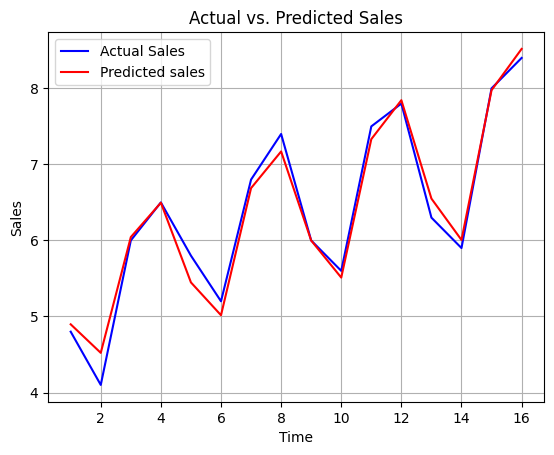

In [191]:
time = df["t"]
plt.plot(time,df["Sales"], label="Actual Sales",color="blue")
plt.plot(time,df["Predicted sales"],label="Predicted sales",color="red")

plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Actual vs. Predicted Sales")
plt.legend()
plt.grid()

	1.	We have yearly data that contains commodity quarterly sales, and our task is to forecast sales for the next year.
	
    2.	We imported the data.
	
    3.	I will first estimate the trend component, which represents the long-term increase or decrease. Since the data is quarterly (4 quarters), I preferred the central moving average.
	
    4.	Now, since we have estimated the trend component, we will remove it by estimating the seasonal component.
	
    5.	The formula for seasonal component is
    (Seasonal component + some irregularity = Total sales / Trend)
	
    6.	 S_t  is the detrended series.
	
    7.	Now, we will estimate the seasonal component by grouping each quarter’s sales over the years and taking their mean.
	
    8.	We will normalize the original seasonal component values (their mean after grouping) to get the seasonal index corresponding to each quarter.
	
    9.	This will give us the seasonal index for each row.
	
    10.	This seasonality index represents the estimated pure seasonal component from the detrended series.
	
    11.	Now, we will deseasonalize the series from the original sales

	12.	This deseasonalized series will still have the trend component.
	
    13.	We will then predict trend sales (deseasonalized sales) using the deseasonalized series.
	•	X = Time Series (t)
	•	Y = Deseasonalized Series
	
    14.	We will get one predicted deseasonalized sales series with the trend component.
	
    15.	Finally, we will multiply it with the seasonality index to get the predicted sales series.